<a href="https://colab.research.google.com/github/ParthPathak27/Cricket-Score-Predictor/blob/main/CricketScorePredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

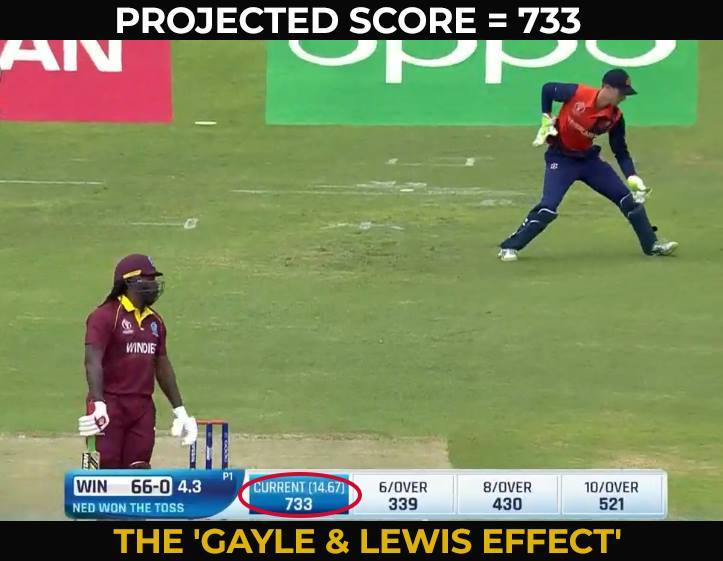

The above picture clearly tells you how bad is taking run rate as a single factor to predict the final score in an limited overs cricket match.  In ODI and T-20 cricket, many factors play a key role in deciding what the final score will be.  Let’s look at some of the key factors:

* Number of wickets left
* Number of balls left
* On how much scores are the current batsman batting?
* How much the team had scored in last 5 overs?
* How much the team had lost wickets in last 5 overs?
* The nature of the pitch
* How strong is the batting and bowling team?

I will use some of these factors to predict score using machine learning algorithms. We use regression analysis in machine learning to predict the final score of an ODI or T-20 match.

## Preparing the dataset
I have not scrapped the web pages to prepare the dataset. I have downloaded the dataset from [cricsheet](https://cricsheet.org/downloads/). The site gives us ball by ball details of matches. I then wrote a custom code to only include some of the features which I will be using.

The dataset contains ball by ball coverage of:

* 1188 ODI matches: [odi.csv](https://github.com/ParthPathak27/Cricket-Score-Predictor/blob/main/odi.csv)
* 1474 T-20 matches: [t20.csv](https://github.com/ParthPathak27/Cricket-Score-Predictor/blob/main/t20.csv)
* 617 IPL matches: [ipl.csv](https://github.com/ParthPathak27/Cricket-Score-Predictor/blob/main/ipl.csv)

Each dataset consists of following columns(features):

* mid: Each match is given a unique number
* date: When the match happened
* venue: Stadium where match is being played
* bat_team: Batting team name
* bowl_team: Bowling team name
* batsman: Batsman name who faced that ball
* bowler: Bowler who bowled that ball
* runs: Total runs scored by team at that instance
* wickets: Total wickets fallen at that instance
* overs: Total overs bowled at that instance
* runs_last_5: Total runs scored in last 5 overs
* wickets_last_5: Total wickets that fell in last 5 overs
* striker: max(runs scored by striker, runs scored by non-striker)
* non-striker: min(runs scored by striker, runs scored by non-striker)
* total: Total runs scored by batting team after first innings

## Importing the dataset

In [27]:
import pandas as pd
dataset = pd.read_csv('/content/ipl.csv')
X = dataset.iloc[:,[7,8,9,12,13]].values #Input features
y = dataset.iloc[:, 14].values #Label

I have used ‘ipl.csv’ datafile here for predicting scores in ODI cricket. One can use ‘t20.csv’ or ‘odi.csv’ if they want to predict scores of T-20 matches or IPL matches respectively.

In [28]:
X

array([[1.00e+00, 0.00e+00, 1.00e-01, 0.00e+00, 0.00e+00],
       [1.00e+00, 0.00e+00, 2.00e-01, 0.00e+00, 0.00e+00],
       [2.00e+00, 0.00e+00, 2.00e-01, 0.00e+00, 0.00e+00],
       ...,
       [1.28e+02, 7.00e+00, 1.94e+01, 4.70e+01, 1.20e+01],
       [1.29e+02, 7.00e+00, 1.95e+01, 4.70e+01, 1.30e+01],
       [1.29e+02, 8.00e+00, 1.96e+01, 4.70e+01, 1.30e+01]])

In [29]:
y

array([222, 222, 222, ..., 129, 129, 129])

**Features Used:**

* runs
* wickets
* overs
* striker
* non-striker

**Why didn’t I use other features?**

While experimenting, all the other features didn’t make much difference in results. You can use a different combination of features and test the code on them.

**Label Used**: total

## Splitting data into training and testing set


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

We will train our model on 75 percent of the dataset and test the model on remaining dataset.

## Feature Scaling the data

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Feature scaling is a very important part of machine learning. You can read more about it [here](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html)

## Training the dataset
* Using Linear Regression Algorithm

In [32]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

* Using Random Forest Regression Algorithm

In [33]:
from sklearn.ensemble import RandomForestRegressor
lin = RandomForestRegressor(n_estimators=100,max_features=None)
lin.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=None, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

You can use any one of these algorithms but as you will see later random forest regression gives us better accuracy.

## Testing the dataset on trained model

**R-squared value**

R-sqaured is a statistic that will give some information about the goodness of fit of a model. In regression, the R-squared coefficient of determination is a statistical measure of how well the regression predictions approximate the real data points. An R-squared value of 1 indicates that the regression predictions perfectly fit the data.

Custom accuracy

I have defined my own function to measure accuracy of model. Custom Accuracy is defined on the basis of difference between the predicted score and actual score. If this difference falls below a particular thresold, we count it as a correct prediction.


In [34]:
def custom_accuracy(y_test,y_pred,thresold):
    right = 0
    l = len(y_pred)
    for i in range(0,l):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            right += 1
    return ((right/l)*100)

I have kept thresold as 20 for ODI matches and 10 for T-20 matches.

In [35]:
y_pred = lin.predict(X_test)
score = lin.score(X_test,y_test)*100
print("R-squared value:" , score)
print("Custom accuracy:" , custom_accuracy(y_test,y_pred,10))

R-squared value: 67.30045271078782
Custom accuracy: 65.17575247316354


## Testing with a custom input

In [36]:
import numpy as np
new_prediction = lin.predict(sc.transform(np.array([[100,0,13,50,50]])))
print("Prediction score:" , new_prediction)

Prediction score: [175.6]
